In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)

In [3]:
df = pd.read_csv('tae.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [5]:
columns = ['English speaker', 'Course instructor', 'Course', 'Summer or regular semester', 'Class size', 'Class attribute']

In [6]:
df.columns = columns

In [7]:
df.head()

,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
English speaker               151 non-null int64
Course instructor             151 non-null int64
Course                        151 non-null int64
Summer or regular semester    151 non-null int64
Class size                    151 non-null int64
Class attribute               151 non-null int64
dtypes: int64(6)
memory usage: 7.1 KB


In [9]:
x = df.drop('Class attribute', axis=1).values
labels = df['Class attribute']
y = pd.get_dummies(df['Class attribute']).values

In [10]:
x.shape

(151, 5)

In [11]:
num_inputs = 5
neurons1 = 50
neurons2 = 20
num_outputs = 3

In [12]:
W1 = np.random.randn(num_inputs,neurons1)
b1 = np.zeros(neurons1)

W2 = np.random.randn(neurons1,neurons2)
b2 = np.zeros(neurons2)

W3 = np.random.randn(neurons2,num_outputs)
b3 = np.zeros(num_outputs)

In [13]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def sigmoid_der(x):
#     return x * (1 - x)

In [14]:
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid(x))

# def softmax(A):  
#     expA = np.exp(A)
#     return expA / expA.sum(axis=1, keepdims=True)

In [15]:
lr = 0.01
error_tab = []
lr_tab = []
acc_tab = []
epochs = 10000

In [16]:
for epoch in range(epochs):
    
    ########## Forward Propagation
    
    # Layer 1
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # Layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    # Layer 3
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    
    ########## Back Propagation
    
    ########## Layer 3
    delta3 = a3-y
    dW3 = np.dot(a2.T, delta3)
    
    db3 = delta3
    
    ########## Layer 2
    delta2 = np.dot(delta3, W3.T) * sigmoid_der(z2)
    dW2 = np.dot(a1.T, delta2)
    
    db2 = delta2
    
    ########## Layer 1
    delta1 = np.dot(delta2, W2.T) * sigmoid_der(z1)
    dW1 = np.dot(x.T, delta1)
    
    db1 = delta1
    
    ########## Adaptive learning rate
    lr = lr * 1/(1 + lr/epochs * epoch)
    
    # Update Weights ================
    W1 -= lr * dW1
    b1 -= lr * db1.sum(axis=0)

    W2 -= lr * dW2
    b2 -= lr * db2.sum(axis=0)
    
    W3 -= lr * dW3
    b3 -= lr * db3.sum(axis=0)
    
    if epoch % 200 == 0:
        loss = -np.sum(y * np.log(a3))
        error_tab.append(loss)
        lr_tab.append(lr)
        equals = np.equal(np.argmax(y, axis=1), np.argmax(a3, axis=1))
        acc = np.mean(equals)
        acc_tab.append(acc)
        print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch, loss, acc))

Epoch: 0, Loss: 71.50451264152282, Accuracy: 0.3443708609271523
Epoch: 200, Loss: 184.4916239650984, Accuracy: 0.3576158940397351
Epoch: 400, Loss: 137.13774805252973, Accuracy: 0.5165562913907285
Epoch: 600, Loss: 132.02312365401923, Accuracy: 0.5099337748344371
Epoch: 800, Loss: 134.77737946924657, Accuracy: 0.5231788079470199
Epoch: 1000, Loss: 131.30396075918532, Accuracy: 0.5894039735099338
Epoch: 1200, Loss: 122.6884346170565, Accuracy: 0.6026490066225165
Epoch: 1400, Loss: 114.80139286788847, Accuracy: 0.6357615894039735
Epoch: 1600, Loss: 118.08119363896502, Accuracy: 0.6490066225165563
Epoch: 1800, Loss: 110.91670767949823, Accuracy: 0.6490066225165563
Epoch: 2000, Loss: 103.06389477545352, Accuracy: 0.6688741721854304
Epoch: 2200, Loss: 99.90507135965196, Accuracy: 0.7019867549668874
Epoch: 2400, Loss: 94.2027540409064, Accuracy: 0.7284768211920529
Epoch: 2600, Loss: 97.02536795895566, Accuracy: 0.7152317880794702
Epoch: 2800, Loss: 88.61775588042437, Accuracy: 0.721854304635

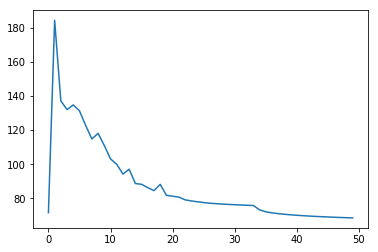

In [17]:
plt.plot(range(len(error_tab)), error_tab)

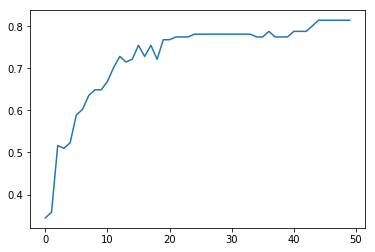

In [18]:
plt.plot(range(len(acc_tab)), acc_tab)

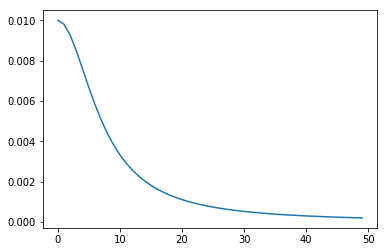

In [19]:
plt.plot(range(len(lr_tab)), lr_tab)